## EPS Announcement Effect on Alibaba(NYSE:BABA) Stock

#### Data from finance.yahoo.com

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression

In [272]:
df = pd.read_csv('BABA.csv', index_col='Date', parse_dates=True)
an = pd.read_excel('baba_analysis.xlsx', index_col='date')
df = pd.concat([df, an], axis=1)
df['estimated_eps'] = df['estimated_eps'].apply(lambda x: x if type(x) == float else float(x[1:]))
df['eps'] = df['eps'].apply(lambda x: x if type(x) == float else float(x[1:]))
df['surprise'] = df['eps'] - df['estimated_eps']
df['surprise_pct'] = df['surprise'] / df['eps']

df['change'] = df['Close'].pct_change()

In [273]:
volume = df['Volume'].median()
volume_ann_days = df[~df['eps'].isna()]['Volume'].median()
volume_beat_days = df[(~df['eps'].isna()) & (df['surprise'] > 0)]['Volume'].median()
volume_miss_days = df[(~df['eps'].isna()) & (df['surprise'] < 0)]['Volume'].median()

print(f'Median Volume: {volume}')
print(f'Volume on EPS announcement days: {volume_ann_days}')
print(f'Volume on EPS beat days: {volume_beat_days}')
print(f'Volume on EPS miss days: {volume_miss_days}')

Median Volume: 15062500.0
Volume on EPS announcement days: 41093200.0
Volume on EPS beat days: 36997700.0
Volume on EPS miss days: 52161400.0


In [274]:
dates = df[~df['eps'].isna()].index

df = df.fillna(method='ffill').copy()

In [249]:
df['surprise'].unique()

array([  nan, -0.07, -0.08,  0.06,  0.03, -0.18,  0.14,  0.16,  0.24,
       -0.08,  0.21,  0.18, -0.08, -0.11,  0.19,  0.03,  0.13,  0.32,
        0.3 ,  0.41,  0.31,  0.16, -0.33,  0.2 , -0.31,  0.42])

## Plotting the closing price since 2015

<AxesSubplot:>

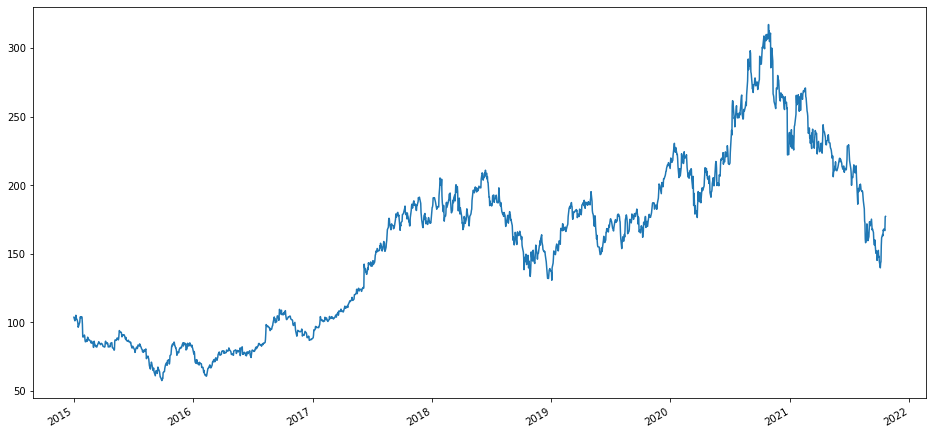

In [250]:
df['Close'].loc['2015':].plot(figsize=(16,8))

## Change after most recent announcement

<AxesSubplot:>

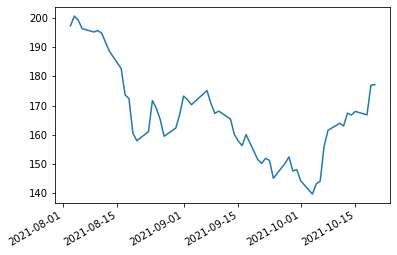

In [251]:
df.loc[dates[-1]:]['Close'].plot()

## Trend following the days when EPS estimate is beat

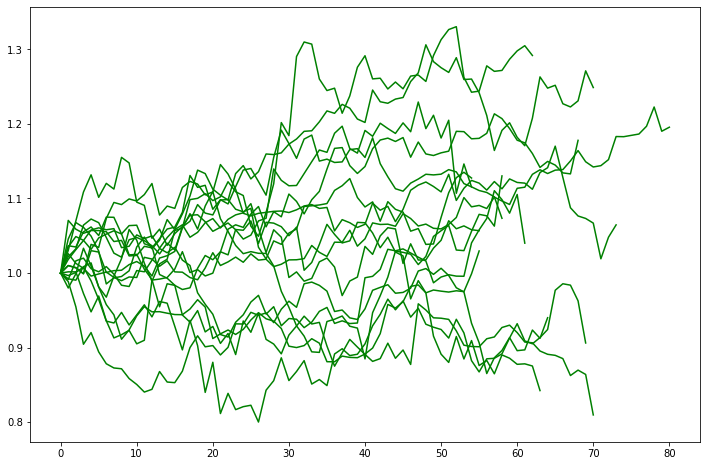

In [252]:
results_above = []
plt.figure(figsize=(12,8))
for i in range(len(dates) - 1):
    if df.loc[dates[i]]['surprise'] > 0:
        results_above.append(df.loc[dates[i]:dates[i+1]]['Close'].values[:40] / df.loc[dates[i]]['Close'])
        plt.plot(df.loc[dates[i]:dates[i+1]]['Close'].values / df.loc[dates[i]]['Close'], 'g')
results_above = pd.DataFrame(results_above)

## Mean Trend when EPS beats estimates

In [253]:
mean = results_above.mean()
std = results_above.std()
upper = mean + std
lower = mean - std
res_above = pd.concat([mean,upper,lower],axis = 1)
res_above.columns = ['Mean EPS Beat', '1STD Above Mean EPS Beat', '1STD Below Mean EPS Beat']

<AxesSubplot:>

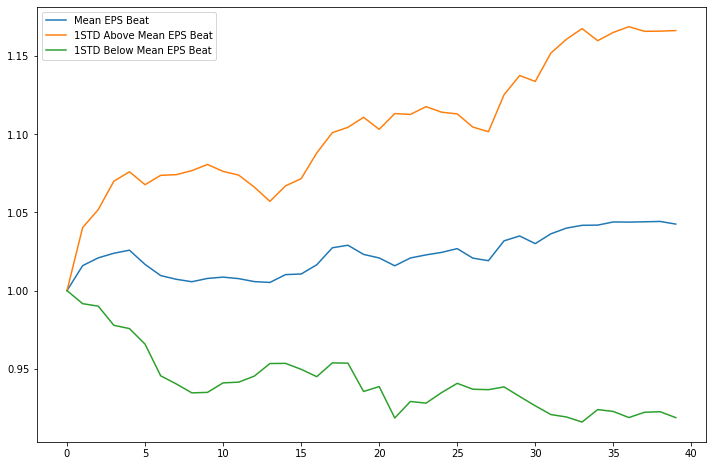

In [254]:
res_above.plot(figsize=(12,8))

## Mean Trend when EPS misses estimates

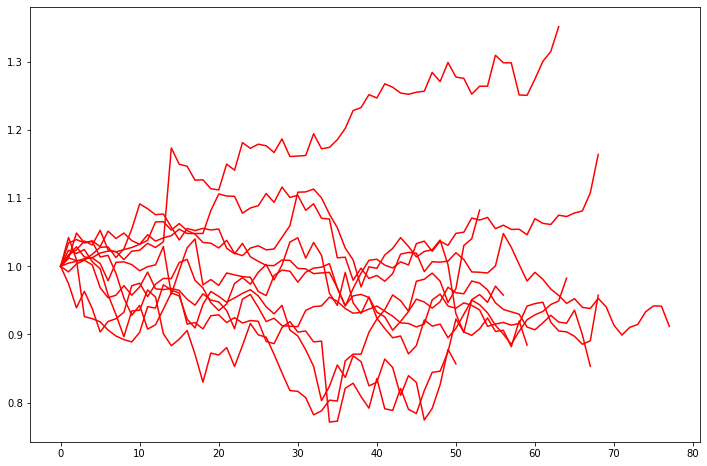

In [255]:
results_below = []
plt.figure(figsize=(12,8))
for i in range(len(dates) - 1):
    if df.loc[dates[i]]['surprise'] < 0:
        results_below.append(df.loc[dates[i]:dates[i+1]]['Close'].values[:40] / df.loc[dates[i]]['Close'])
        plt.plot(df.loc[dates[i]:dates[i+1]]['Close'].values / df.loc[dates[i]]['Close'], 'r')
results_below = pd.DataFrame(results_below)

In [256]:
mean = results_below.mean()
std = results_below.std()
upper = mean + std
lower = mean - std
res_below = pd.concat([mean,upper,lower], axis=1)
res_below.columns = ['Mean EPS Missed', '1STD Above Mean EPS Missed', '1STD Below Mean EPS Missed']

<AxesSubplot:>

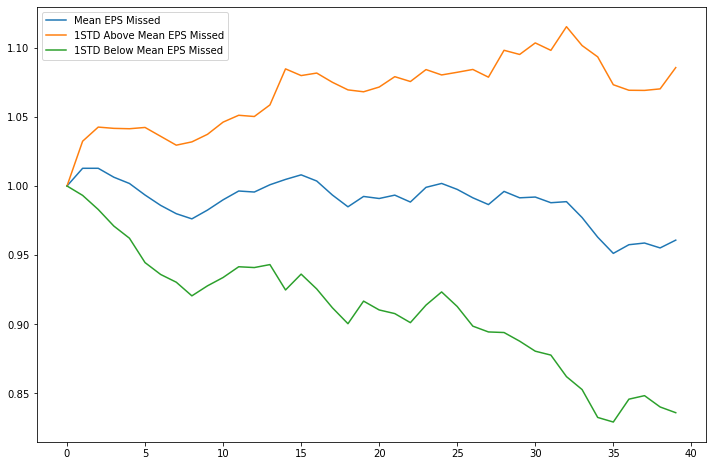

In [257]:
res_below.plot(figsize=(12,8))

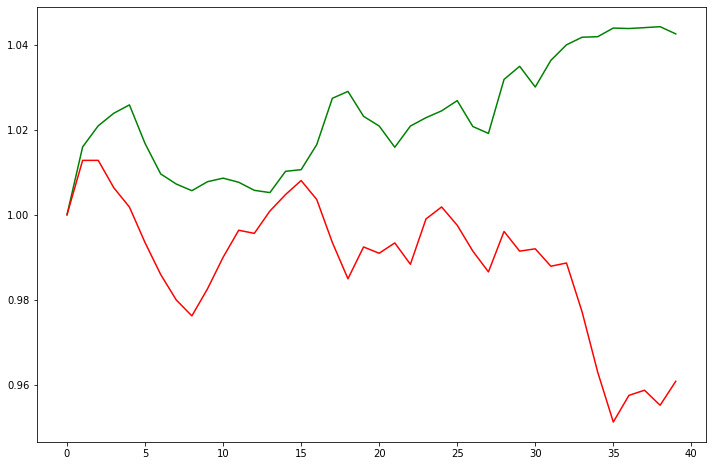

In [258]:
plt.figure(figsize=(12,8))
plt.plot(res_above['Mean EPS Beat'], 'g')
plt.plot(res_below['Mean EPS Missed'], 'r')

In [259]:
beat_change = df[df['surprise'] > 0]['change'].mean()
miss_change = df[df['surprise'] < 0]['change'].mean()

print(f'Average change on days after EPS beat: {beat_change}')
print(f'Average change on days after EPS missed: {miss_change}')

Average change on days after EPS beat: 0.0010801586482489644
Average change on days after EPS missed: -0.0002766333846706468


In [260]:
df['change'].std()

0.021611879055509632

In [261]:
df['surprise'].std()

0.19637106104743438

In [297]:
df['surprise_pct'].sort_values().unique()

array([-0.9       , -0.4       , -0.28181818, -0.25      , -0.20588235,
       -0.20512821, -0.2037037 , -0.12727273, -0.12121212, -0.05970149,
        0.02158273,  0.04109589,  0.06711409,  0.09411765,  0.14772727,
        0.15789474,  0.17647059,  0.17982456,  0.18811881,  0.19444444,
        0.20134228,  0.22018349,  0.22068966,  0.22340426,  0.25396825,
        0.26923077,  0.34444444,         nan])

In [300]:
(df[df['surprise_pct'] > 0.20]['change'] > 0).value_counts()

True     244
False    190
Name: change, dtype: int64

In [301]:
(df[df['surprise_pct'] < -0.2]['change'] < 0).value_counts()

False    222
True     221
Name: change, dtype: int64

### Conclusion

The day of the announcement, the stock is expected to trade in much larger volume - ~2.5x on beat days, and ~3.5 on missed days.
The price after the announcement depends on whether the outcome was positive relative to the estimate. The implied 40 trading day change is about +4.2% given that EPS expectation was beat and about -4% given that the EPS expectation was missed

This analisys should be taken into consideration when developing a trading system as we can quite easily make predictions regarding the direction when just taking into consideration the last EPS surprise. This seems to be right especially for beating the EPS expectations

In [263]:
(df['change'] > 0).value_counts()

True     906
False    879
Name: change, dtype: int64

In [268]:
df['surprise'] / df['eps']

2014-09-19         NaN
2014-09-22         NaN
2014-09-23         NaN
2014-09-24         NaN
2014-09-25         NaN
                ...   
2021-10-14    0.194444
2021-10-15    0.194444
2021-10-18    0.194444
2021-10-19    0.194444
2021-10-20    0.194444
Length: 1785, dtype: float64

In [296]:
df['surprise_pct'].sort_values().unique()

array([-0.9       , -0.4       , -0.28181818, -0.25      , -0.20588235,
       -0.20512821, -0.2037037 , -0.12727273, -0.12121212, -0.05970149,
        0.02158273,  0.04109589,  0.06711409,  0.09411765,  0.14772727,
        0.15789474,  0.17647059,  0.17982456,  0.18811881,  0.19444444,
        0.20134228,  0.22018349,  0.22068966,  0.22340426,  0.25396825,
        0.26923077,  0.34444444,         nan])